In [ ]:
# 심리투자 법칙

# 시장 지표를 크게 세 가지로 나눌 수 있다. 이동평균, MBCD 같이 시장의 흐름을 나타내는 지표를 추세지표라고 하는데,
# 나타내는 지표를 추세지표라고 하는데, 시장이 움직일 때는 잘 맞지만 시장이 횡보할 때 잘못된 신호를 보낼 수 있다. 

# 스토캐스틱이나 RSI처럼 과거 일정 기간의 가격 범위 안에서 현재가격의 상대적인 위치를 나타내는 지표를 오실레이터
# 라고 하는데, 현재 가격 위치가 주기적으로 변화하느 모습이 오실레이터 발진기에서 생성하는 교류 주파수 모습과 유사
# 하다. 오실레이터는 횡보장에서 전환점을 포착하는 데 적합하지만 가격보다 앞서 변화는 경향이 있다, 


end_date is initialized to '2022-02-02'


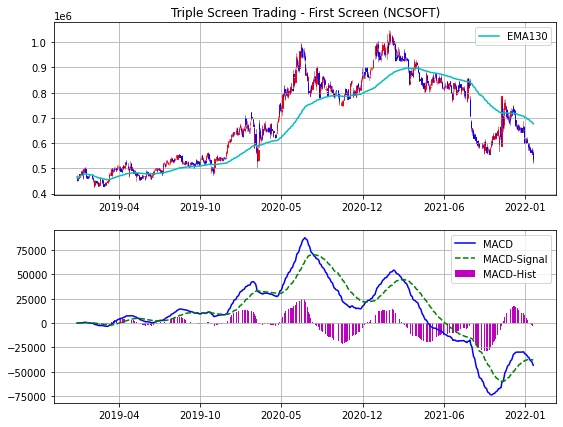

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from mpl_finance import candlestick_ohlc
#from mplfinance.original_flavor import candlestick_ohlc
import matplotlib.dates as mdates
import Analyzer

mk = Analyzer.MarketDB()
df = mk.get_daily_price('엔씨소프트', '2019-01-01')


ema60 = df.close.ewm(span=60).mean()   # ① 종가의 12주 지수 이동평균
ema130 = df.close.ewm(span=130).mean() # ② 종가의 12주 지수 이동평균
macd = ema60 - ema130                  # ③ MACD선
signal = macd.ewm(span=45).mean()      # ④ 신호선(MACD의 9주 지수 이동평균)
macdhist = macd - signal               # ⑤ MACD 히스토그램

df = df.assign(ema130=ema130, ema60=ema60, macd=macd, signal=signal,
    macdhist=macdhist).dropna() 
df['number'] = df.index.map(mdates.date2num)  # ⑥
ohlc = df[['number','open','high','low','close']]

plt.figure(figsize=(9, 7))
p1 = plt.subplot(2, 1, 1)
plt.title('Triple Screen Trading - First Screen (NCSOFT)')
plt.grid(True)
candlestick_ohlc(p1, ohlc.values, width=.6, colorup='red', 
    colordown='blue')  # ⑦
p1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.plot(df.number, df['ema130'], color='c', label='EMA130')
plt.legend(loc='best')

p2 = plt.subplot(2, 1, 2)
plt.grid(True)
p2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.bar(df.number, df['macdhist'], color='m', label='MACD-Hist')
plt.plot(df.number, df['macd'], color='b', label='MACD')
plt.plot(df.number, df['signal'], 'g--', label='MACD-Signal')
plt.legend(loc='best')
plt.show()